In [1]:
import pandas as pd
import seaborn as sb

from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter1d

In [2]:
A = pd.read_json("../../Data/Stress/400VU/MI2/10W-400VU-stress-a-report1.json")
B = pd.read_json("../../Data/Stress/400VU/MI2/10W-400VU-stress-b-report2.json")
C = pd.read_json("../../Data/Stress/400VU/MI2/10W-400VU-stress-c-report1.json")

In [3]:
 def get_time_series(dataframe: pd.DataFrame) -> pd.Series:
    number_of_rows = len(dataframe.index)

    return pd.Series(
        name='time',
        data=[element * 10 for element in range(number_of_rows)]
    )

In [4]:
 def get_latency(time: pd.Series, dataframe: pd.DataFrame) -> pd.DataFrame:
    latency = pd.concat([time, dataframe['latency']], axis=1)
    latency = latency.set_index('time')

    for key, value in latency['latency'][0].items():
        latency[key] = latency['latency'].apply(lambda object: object[key])

    latency = latency.drop(columns=['latency', 'max'])

    return latency[['p95', 'p99', 'median', 'min']]

In [10]:
 def get_concurrency(time: pd.Series, a: pd.DataFrame) -> pd.DataFrame:
    concurrency = pd.concat([time, a['concurrency']], axis=1)
    concurrency['concurrency'] = gaussian_filter1d(sigma=0.3, input=concurrency['concurrency'])
    return concurrency.set_index('time')

In [15]:
time = get_time_series(B)
latency_a = get_latency(time, A)
latency_b = get_latency(time, B)
latency_c = get_latency(time, C)
concurrency_a = get_concurrency(time, A).rename(columns={"concurrency": "Virtuelle Nutzer"})

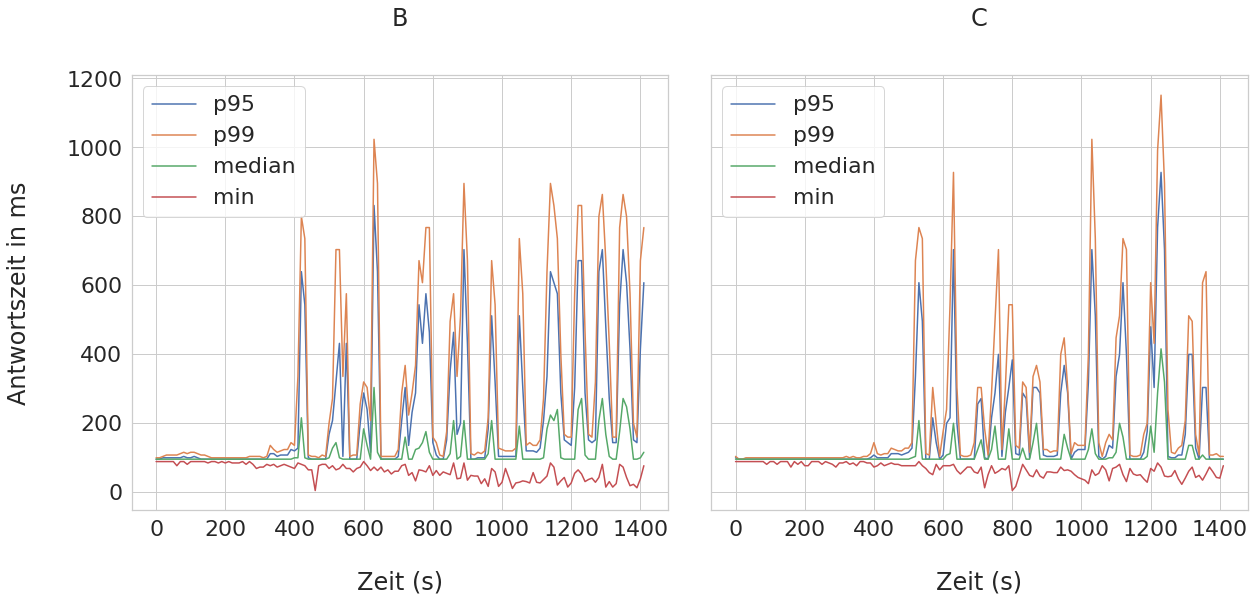

In [6]:
sb.set(font_scale=2) 
sb.set_style("whitegrid")

figure, row = plt.subplots(
    nrows=1,
    ncols=2,
    sharey='row',
    sharex='col',
    figsize=(20,8)
)

figure.subplots_adjust(wspace=0.08) # hspace=0

row[0].set_title('B', y=1.1)
row[1].set_title('C', y=1.1)
row[0].set_ylabel('Antwortszeit in ms', labelpad=35)
row[0].set_xlabel('Zeit (s)', labelpad=30)
row[1].set_xlabel('Zeit (s)', labelpad=30)


# Plot
latency_plot = sb.lineplot(
    ax=row[0],
    dashes=False,
    data=latency_b
)
latency_plot = sb.lineplot(
    ax=row[1],
    dashes=False,
    data=latency_c
)

In [7]:
figure.subplots_adjust(right=0.85, top=0.88, bottom=0.20)
figure.savefig('./400VU_BC.pdf')

Text(0.5, 0, 'Zeit (s)')

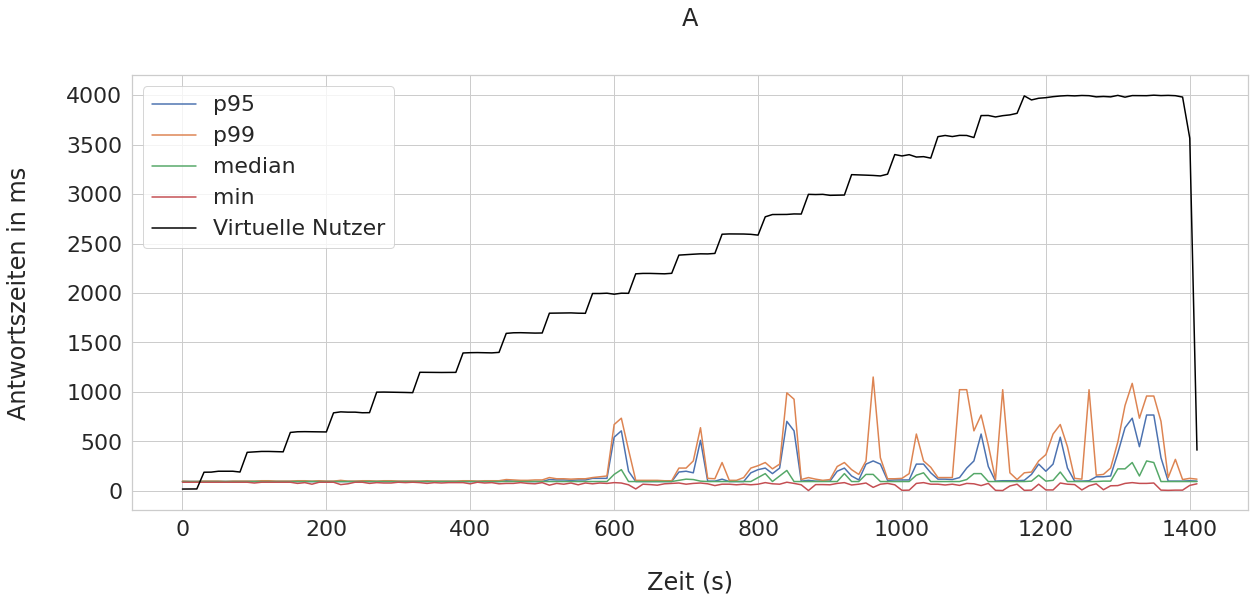

In [16]:
sb.set(font_scale=2) 
sb.set_style("whitegrid")
figure = plt.figure(figsize = (20,8))

# Plot
latency_plot = sb.lineplot(
    dashes=False,
    palette=["black"],
    data=concurrency_a,
)
latency_plot = sb.lineplot(
    dashes=False,
    data=latency_a,
)


# Label settings
latency_plot.set_title('A', y=1.1)
latency_plot.set_ylabel('Antwortszeiten in ms', labelpad=35)
latency_plot.set_xlabel('Zeit (s)', labelpad=30)

In [9]:
figure.subplots_adjust(right=0.85, top=0.88, bottom=0.20)
figure.savefig('./400VU_A.pdf')